In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
class PCA:
    def __init__(self, component):
        """
        Initialize the PCA object.
        Parameters
        ----------
        component: integer
        """
        self.component = component
        
    def fit(self, X):
        """
        Fit the PCA model to the given data.
        
        Parameters
        ----------
        X: numpy array.
        """
        # Find the mean and subtract so that it is centered.
        self.mean = np.mean(X, axis=0)
        centeredX = X - self.mean
        
        # Find the covariance matrix
        cov = np.cov(centeredX.T)
        
        # Find the eigens of the covariance matrix
        eigenvalues, eigenvectors = np.linalg.eigh(cov)
        
        # Sort the values in descending order
        indices = np.argsort(eigenvalues)[::-1]
        eigenvalues = eigenvalues[indices]
        eigenvectors = eigenvectors[:, indices]
        
        self.Finalcomponents = eigenvectors[:, :self.component]

    def transform(self, X):
        """
        Transform the given data using the PCA model.
        Parameters
        ----------
        X: numpy array.
        """
        # Subtract the mean we found so that it is centered.
        centeredX = X - self.mean
        
        # Find image in lower dimesional space.
        return np.dot(centeredX, self.Finalcomponents)
    
    def inverse(self, transformedData):
        return np.dot(transformedData, self.Finalcomponents.T) + self.mean


In [3]:
from sklearn.datasets import fetch_olivetti_faces

faces = fetch_olivetti_faces()


In [4]:
print(faces.DESCR)

.. _olivetti_faces_dataset:

The Olivetti faces dataset
--------------------------

`This dataset contains a set of face images`_ taken between April 1992 and 
April 1994 at AT&T Laboratories Cambridge. The
:func:`sklearn.datasets.fetch_olivetti_faces` function is the data
fetching / caching function that downloads the data
archive from AT&T.

.. _This dataset contains a set of face images: https://cam-orl.co.uk/facedatabase.html

As described on the original website:

    There are ten different images of each of 40 distinct subjects. For some
    subjects, the images were taken at different times, varying the lighting,
    facial expressions (open / closed eyes, smiling / not smiling) and facial
    details (glasses / no glasses). All the images were taken against a dark
    homogeneous background with the subjects in an upright, frontal position 
    (with tolerance for some side movement).

**Data Set Characteristics:**

    =================   =====================
    Classes    

In [5]:
# It is in numpy array format
faces.data

array([[0.30991736, 0.3677686 , 0.41735536, ..., 0.15289256, 0.16115703,
        0.1570248 ],
       [0.45454547, 0.47107437, 0.5123967 , ..., 0.15289256, 0.15289256,
        0.15289256],
       [0.3181818 , 0.40082645, 0.49173555, ..., 0.14049587, 0.14876033,
        0.15289256],
       ...,
       [0.5       , 0.53305787, 0.607438  , ..., 0.17768595, 0.14876033,
        0.19008264],
       [0.21487603, 0.21900827, 0.21900827, ..., 0.57438016, 0.59090906,
        0.60330576],
       [0.5165289 , 0.46280992, 0.28099173, ..., 0.35950413, 0.3553719 ,
        0.38429752]], dtype=float32)

In [6]:
faces.data.shape

(400, 4096)

In [7]:
# There are 40 different classes 
faces.target

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13,
       13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18,
       18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 22,
       22, 22, 22, 22, 22

In [8]:
faces.target.shape

(400,)

In [9]:
print("We know that the data is already normalized so we dont have to do any preprocessing")

We know that the data is already normalized so we dont have to do any preprocessing


Lets create our PCA object

In [10]:
pca = PCA(2)
pca.fit(faces.data)

In [11]:
transformedData = pca.transform(faces.data)
transformedData.shape

(400, 2)

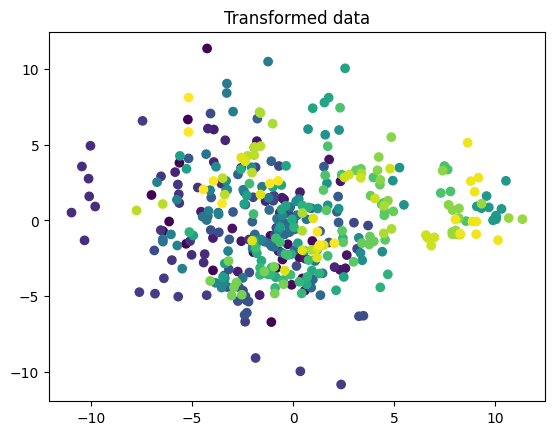

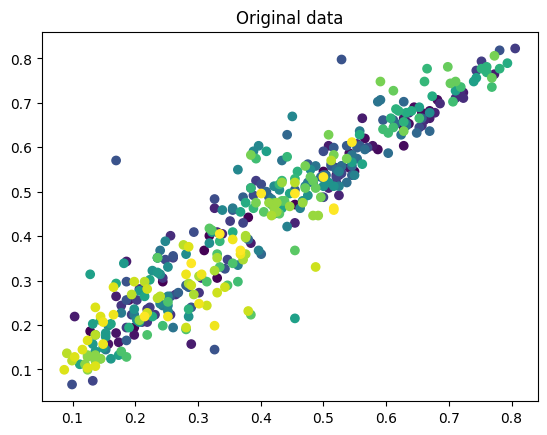

In [12]:
x = transformedData[:, 0]
y = transformedData[:, 1]

originalx = faces.data[:, 0]
originaly = faces.data[:, 1]

# Scatter plot the transformed data
plt.scatter(x, y, c=faces.target)
plt.title('Transformed data')

plt.figure()
plt.scatter(originalx, originaly, c=faces.target)
plt.title('Original data')

plt.show()

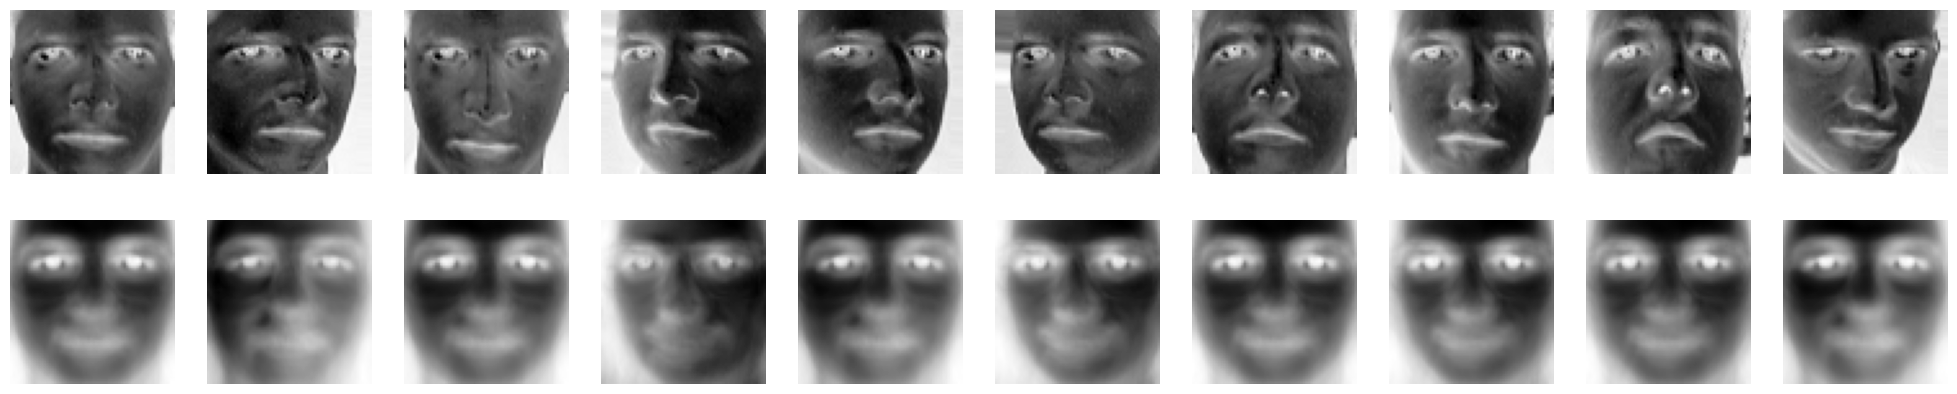

In [13]:
fig, axes = plt.subplots(2,10, figsize=(25,5))
for i in range(10):
    
    axes[0,i].imshow(faces.data[i].reshape(64,64), cmap = "Greys")
    axes[1,i].imshow(pca.inverse(transformedData)[i].reshape(64,64), cmap = "Greys")
    axes[0,i].axis("off")
    axes[1,i].axis("off")

In [14]:
pca = PCA(50)
pca.fit(faces.data)
transformedData = pca.transform(faces.data)
transformedData.shape

(400, 50)

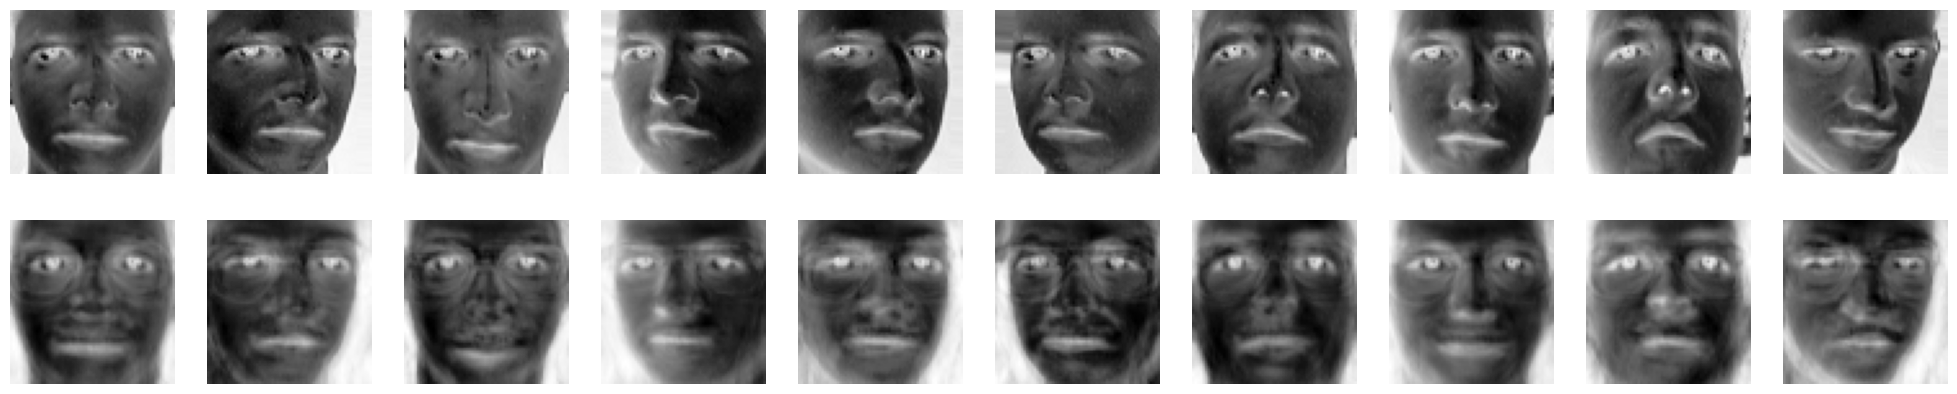

In [15]:
fig, axes = plt.subplots(2,10, figsize=(25,5))
for i in range(10):
    
    axes[0,i].imshow(faces.data[i].reshape(64,64), cmap = "Greys")
    axes[1,i].imshow(pca.inverse(transformedData)[i].reshape(64,64), cmap = "Greys")
    axes[0,i].axis("off")
    axes[1,i].axis("off")

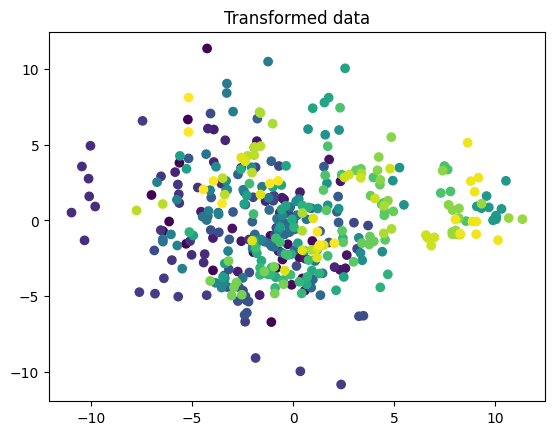

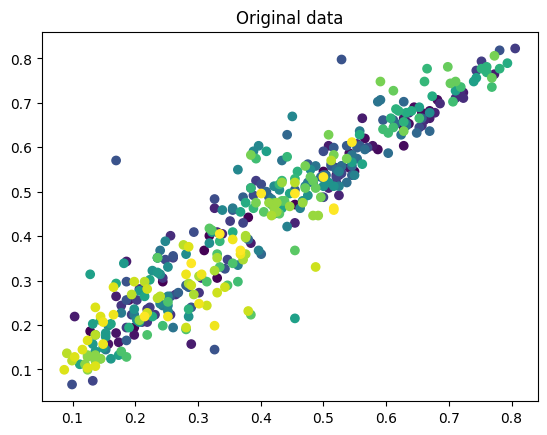

In [16]:
x = transformedData[:, 0]
y = transformedData[:, 1]

originalx = faces.data[:, 0]
originaly = faces.data[:, 1]

# Scatter plot the transformed data
plt.scatter(x, y, c=faces.target)
plt.title('Transformed data')

plt.figure()
plt.scatter(originalx, originaly, c=faces.target)
plt.title('Original data')

plt.show()